# Task3-Feature Engineering
赛题：零基础入门数据挖掘 - 二手车交易价格预测

地址：https://tianchi.aliyun.com/competition/entrance/231784/introduction?spm=5176.12281957.1004.1.38b02448ausjSX

特征工程的主要目标是对特征进行进一步分析，对于数据进行处理，是比赛中最至关重要的的一块，特别的传统的比赛，大家的模型可能都差不多，调参带来的效果增幅是非常有限的，但特征工程的好坏往往会决定了最终的排名和成绩。
> <b>特征工程</b>是将数据转换为能更好地表示潜在问题的特征，从而提高机器学习的性能

具体包括了：

* 特征理解:学习如何识别定量数据和定性数据。
* 特征增强:清洗和填充缺失值，最大化数据集的价值。
* 特征选择:通过统计方法选择一部分特征，以减少数据噪声。
* 特征构建:构建新的特征，探索特征间的联系。
* 特征转换:提取数据中的隐藏结构，用数学方法转换数据集、增强效果。
* 特征学习:利用深度学习的力量，以全新的视角看待数据，从而揭示新的问题，并予以解决。

常见的特征工程：
1. 异常处理
 + 通过箱线图（或 3-Sigma）分析删除异常值；
  >箱型图提供了一个识别异常值的标准，即大于或小于设定的上下界的数值即为异常值。
 +  [ BOX-COX 转换](https://www.cnblogs.com/zgw21cn/archive/2008/08/29/1279681.html)；
 + 长尾截断；
 

 
2. [特征归一化/标准化](https://mp.weixin.qq.com/s/WYPUJbcT6UHvEFMJe8vteg)：
 + 标准化（转换为标准正态分布）；
 + 归一化（抓换到 [0,1] 区间）；
 >归一化(Normalization)，也称为标准化，这里不仅仅是对特征，实际上对于原始数据也可以进行归一化处理，它是将特征（或者数据）都缩放到一个指定的大致相同的数值区间内。
  
  作用：解决某些算法要求样本数据或者特征的数值具有零均值和单位方差；消除
 
 + 针对幂律分布，可以采用公式： $log(\frac{1+x}{1+median})$
 

 
3. 数据分桶：

 数据分箱（也称为离散分箱或分段）是一种数据预处理技术，用于减少次要观察误差的影响，是一种将多个连续值分组为较少数量的“分箱”的方法。一般在建立分类模型时，需要对连续变量离散化，特征离散化后，模型会更稳定，降低了模型过拟合的风险。
 + 等频分桶；
 + 等距分桶；
 + Best-KS 分桶（类似利用基尼指数进行二分类）；
 

 
4. 卡方分桶；
 + 缺失值处理：
 + 不处理（针对类似 XGBoost 等树模型）；
 + 删除（缺失数据太多）；
 + 插值补全，包括均值/中位数/众数/建模预测/多重插补/压缩感知补全/矩阵补全等；
 + 分箱，缺失值一个箱；
 

5. 特征构造：
 + 构造统计量特征，报告计数、求和、比例、标准差等；
 + 时间特征，包括相对时间和绝对时间，节假日，双休日等；
 + 地理信息，包括分箱，分布编码等方法；
 + 非线性变换，包括 log/ 平方/ 根号等；
 + 特征组合，特征交叉；
 + 仁者见仁，智者见智。
 

6. 特征筛选
 > 从给定的特征集合中选出相关特征子集的过程称为特征选择(feature selection)。
 
 对于一个学习任务，给定了属性集，其中某些属性可能对于学习来说很关键，但有些属性意义就不大。
   + 对当前学习任务有用的属性或者特征，称为相关特征(relevant feature)；
对当前学习任务没用的属性或者特征，称为无关特征(irrelevant feature)。
   + 特征选择可能会降低模型的预测能力，因为被剔除的特征中可能包含了有效的信息，抛弃这部分信息一定程度上会降低模型的性能。但这也是计算复杂度和模型性能之间的取舍：

  如果保留尽可能多的特征，模型的性能会提升，但同时模型就变复杂，计算复杂度也同样提升；
如果剔除尽可能多的特征，模型的性能会有所下降，但模型就变简单，也就降低计算复杂度。

 + 过滤式（filter）：先对数据进行特征选择，然后在训练学习器，常见的方法有  Relief/方差选择发/相关系数法/卡方检验法/互信息法；
 + 包裹式（wrapper）：直接把最终将要使用的学习器的性能作为特征子集的评价准则，常见方法有 LVM（Las Vegas Wrapper） ；
 + 嵌入式（embedding）：结合过滤式和包裹式，学习器训练过程中自动进行了特征选择，常见的有 lasso 回归；
 

7. 降维
 + PCA/ LDA/ ICA；
 + 特征选择也是一种降维。

## 01 导入数据

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from operator import itemgetter

train = pd.read_csv('used_car_train_20200313.csv', sep=' ')
test = pd.read_csv('used_car_testA_20200313.csv', sep=' ')
print(train.shape)
print(test.shape)

(150000, 31)
(50000, 30)


## 02 删除异常值

In [5]:
def outliers_proc(data, col_name, scale=3):
    """
    用于清洗异常值，默认用 box_plot（scale=3）进行清洗
    :param data: 接收 pandas 数据格式
    :param col_name: pandas 列名
    :param scale: 尺度
    :return:
    """

    def box_plot_outliers(data_ser, box_scale):
        """
        利用箱线图去除异常值
        :param data_ser: 接收 pandas.Series 数据格式
        :param box_scale: 箱线图尺度，
        :return:
        """
        iqr = box_scale * (data_ser.quantile(0.75) - data_ser.quantile(0.25))
        val_low = data_ser.quantile(0.25) - iqr
        val_up = data_ser.quantile(0.75) + iqr
        rule_low = (data_ser < val_low)
        rule_up = (data_ser > val_up)
        return (rule_low, rule_up), (val_low, val_up)

    data_n = data.copy()
    data_series = data_n[col_name]
    rule, value = box_plot_outliers(data_series, box_scale=scale)
    index = np.arange(data_series.shape[0])[rule[0] | rule[1]]
    print("Delete number is: {}".format(len(index)))
    data_n = data_n.drop(index)
    data_n.reset_index(drop=True, inplace=True)
    print("Now column number is: {}".format(data_n.shape[0]))
    index_low = np.arange(data_series.shape[0])[rule[0]]
    outliers = data_series.iloc[index_low]
    print("Description of data less than the lower bound is:")
    print(pd.Series(outliers).describe())
    index_up = np.arange(data_series.shape[0])[rule[1]]
    outliers = data_series.iloc[index_up]
    print("Description of data larger than the upper bound is:")
    print(pd.Series(outliers).describe())
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 7))
    sns.boxplot(y=data[col_name], data=data, palette="Set1", ax=ax[0])
    sns.boxplot(y=data_n[col_name], data=data_n, palette="Set1", ax=ax[1])
    return data_n

Delete number is: 963
Now column number is: 149037
Description of data less than the lower bound is:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: power, dtype: float64
Description of data larger than the upper bound is:
count      963.000000
mean       846.836968
std       1929.418081
min        376.000000
25%        400.000000
50%        436.000000
75%        514.000000
max      19312.000000
Name: power, dtype: float64


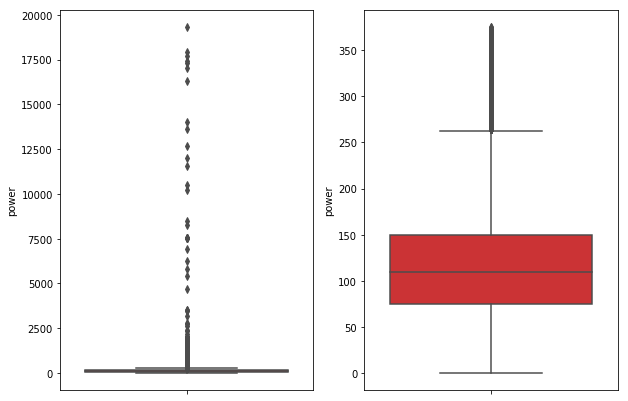

In [4]:
train = outliers_proc(train, 'power', scale=3)

# 03 特征构造

In [8]:
train['train']=1
test['train']=0
data = pd.concat([train, test], ignore_index=True, sort=False)
data['used_time'] = (pd.to_datetime(data['creatDate'], format='%Y%m%d', errors='coerce') - pd.to_datetime(data['regDate'], format='%Y%m%d', errors='coerce')).dt.days
data['used_time'].isnull().sum()

15072

In [9]:
# 从邮编中提取城市信息
data['city'] = data['regionCode'].apply(lambda x : str(x)[:-3])

In [10]:
train_gb = train.groupby("brand")
all_info = {}
for kind, kind_data in train_gb:
    info = {}
    kind_data = kind_data[kind_data['price'] > 0]
    info['brand_amount'] = len(kind_data)
    info['brand_price_max'] = kind_data.price.max()
    info['brand_price_median'] = kind_data.price.median()
    info['brand_price_min'] = kind_data.price.min()
    info['brand_price_sum'] = kind_data.price.sum()
    info['brand_price_std'] = kind_data.price.std()
    info['brand_price_average'] = round(kind_data.price.sum() / (len(kind_data) + 1), 2)
    all_info[kind] = info
brand_fe = pd.DataFrame(all_info).T.reset_index().rename(columns={"index": "brand"})
data = data.merge(brand_fe, how='left', on='brand')

In [11]:
bin = [i*10 for i in range(31)]
data['power_bin'] = pd.cut(data['power'], bin, labels=False)
data[['power_bin', 'power']].head()

,power_bin,power
0,5.0,60
1,NaN,0
2,16.0,163
3,19.0,193
4,6.0,68


In [12]:
data = data.drop(['creatDate', 'regDate', 'regionCode'], axis=1)

In [13]:
# 给树模型构造的特征导出
data.to_csv('data_for_tree.csv', index=0)


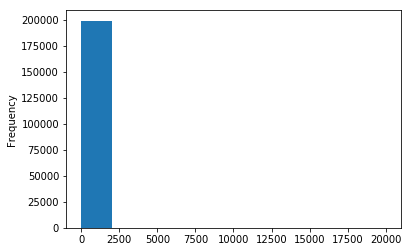

In [14]:
# 继续为LR NN构造特征
data['power'].plot.hist()

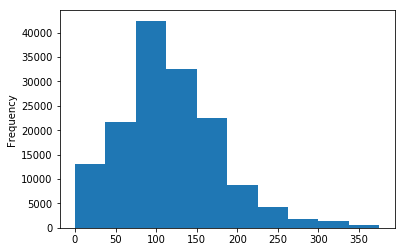

In [15]:
train['power'].plot.hist()

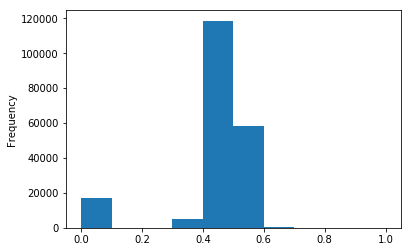

In [16]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data['power'] = np.log(data['power'] + 1) 
data['power'] = ((data['power'] - np.min(data['power'])) / (np.max(data['power']) - np.min(data['power'])))
data['power'].plot.hist()

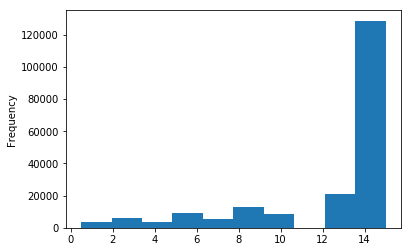

In [17]:
# km 特征
data['kilometer'].plot.hist()

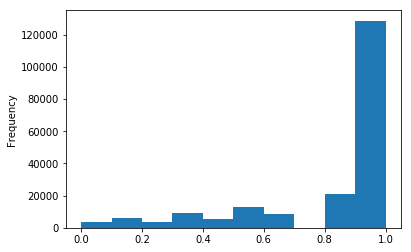

In [18]:
data['kilometer'] = ((data['kilometer'] - np.min(data['kilometer'])) / 
                        (np.max(data['kilometer']) - np.min(data['kilometer'])))
data['kilometer'].plot.hist()

In [19]:
def max_min(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

data['brand_amount'] = ((data['brand_amount'] - np.min(data['brand_amount'])) / 
                        (np.max(data['brand_amount']) - np.min(data['brand_amount'])))
data['brand_price_average'] = ((data['brand_price_average'] - np.min(data['brand_price_average'])) / 
                               (np.max(data['brand_price_average']) - np.min(data['brand_price_average'])))
data['brand_price_max'] = ((data['brand_price_max'] - np.min(data['brand_price_max'])) / 
                           (np.max(data['brand_price_max']) - np.min(data['brand_price_max'])))
data['brand_price_median'] = ((data['brand_price_median'] - np.min(data['brand_price_median'])) /
                              (np.max(data['brand_price_median']) - np.min(data['brand_price_median'])))
data['brand_price_min'] = ((data['brand_price_min'] - np.min(data['brand_price_min'])) / 
                           (np.max(data['brand_price_min']) - np.min(data['brand_price_min'])))
data['brand_price_std'] = ((data['brand_price_std'] - np.min(data['brand_price_std'])) / 
                           (np.max(data['brand_price_std']) - np.min(data['brand_price_std'])))
data['brand_price_sum'] = ((data['brand_price_sum'] - np.min(data['brand_price_sum'])) / 
                           (np.max(data['brand_price_sum']) - np.min(data['brand_price_sum'])))

In [20]:
data = pd.get_dummies(data, columns=['model', 'brand', 'bodyType', 'fuelType',
                                     'gearbox', 'notRepairedDamage', 'power_bin'])

In [21]:
# 这份数据可以给 LR 用
data.to_csv('data_for_lr.csv', index=0)

# 04 特征筛选

In [22]:
## 过滤式
print(data['power'].corr(data['price'], method='spearman'))
print(data['kilometer'].corr(data['price'], method='spearman'))
print(data['brand_amount'].corr(data['price'], method='spearman'))
print(data['brand_price_average'].corr(data['price'], method='spearman'))
print(data['brand_price_max'].corr(data['price'], method='spearman'))
print(data['brand_price_median'].corr(data['price'], method='spearman'))

0.5728285196051496
-0.4082569701616764
0.058156610025581514
0.3834909576057687
0.259066833880992
0.38691042393409447


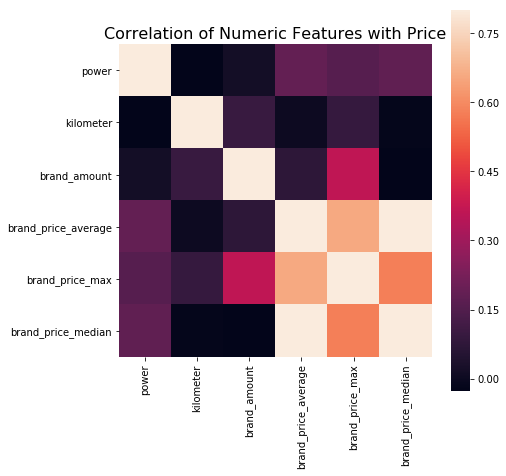

In [23]:
#利用sns绘图
data_numeric = data[['power', 'kilometer', 'brand_amount', 'brand_price_average', 'brand_price_max', 'brand_price_median']]
correlation = data_numeric.corr()
f , ax = plt.subplots(figsize = (7, 7))
plt.title('Correlation of Numeric Features with Price',y=1,size=16)
sns.heatmap(correlation,square = True,  vmax=0.8)

In [ ]:
## 包裹式
# k_feature 太大会很难跑，没服务器，所以提前 interrupt 了
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
sfs = SFS(LinearRegression(),
           k_features=10,
           forward=True,
           floating=False,
           scoring = 'r2',
           cv = 0)
x = data.drop(['price'], axis=1)
x = x.fillna(0)
y = data['price']
sfs.fit(x, y)
